### Project Title : Bank Term Deposit Prediction

#### Importing Necessary Packages

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import imblearn
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.metrics import confusion_matrix , classification_report, f1_score, accuracy_score,\
precision_score, recall_score, fbeta_score, make_scorer
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import os
import pickle
import warnings
warnings.filterwarnings('ignore')

print("All libraries imported successfully!")


All libraries imported successfully!


#### Loading Dataset

In [74]:
data = pd.read_csv('Dataset/bank.csv', sep=';', quotechar='"')
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [75]:
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


#### Exploratory Data Analysis 

In [76]:
#checking data types and non-null values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [77]:
#checking unique values for each column
data.nunique()

age            67
job            12
marital         3
education       4
default         2
balance      2353
housing         2
loan            2
contact         3
day            31
month          12
duration      875
campaign       32
pdays         292
previous       24
poutcome        4
y               2
dtype: int64

In [78]:
#checking summary statistics for numerical columns 
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


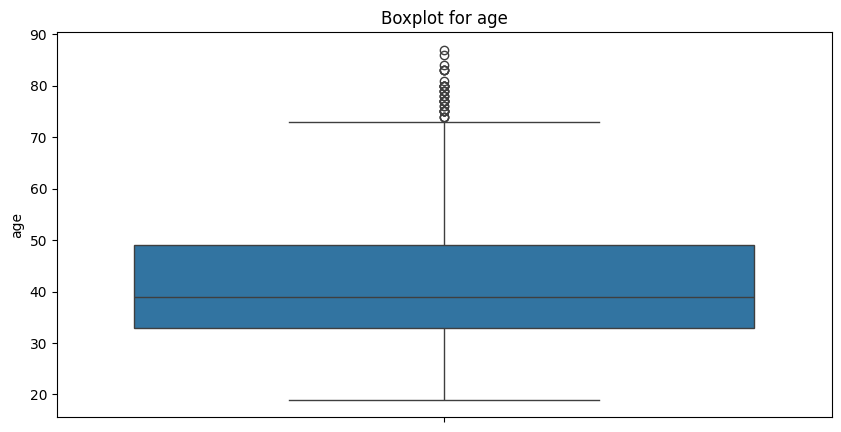

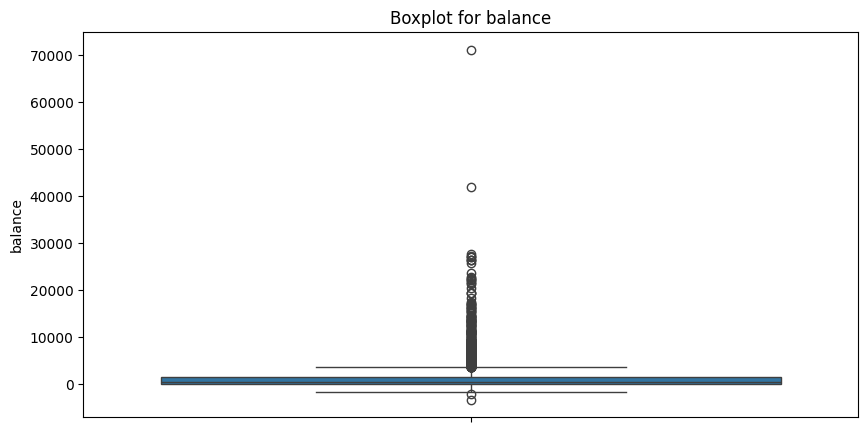

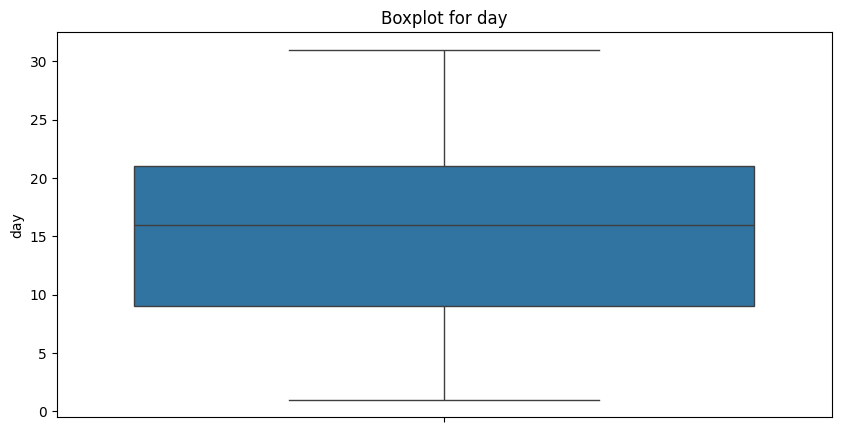

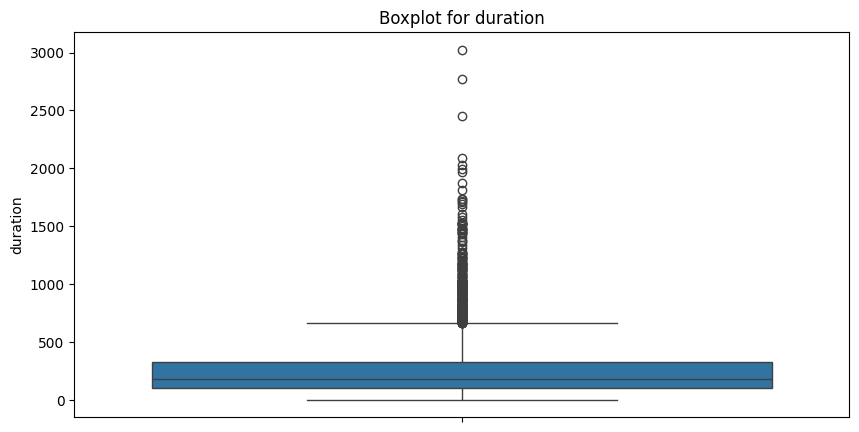

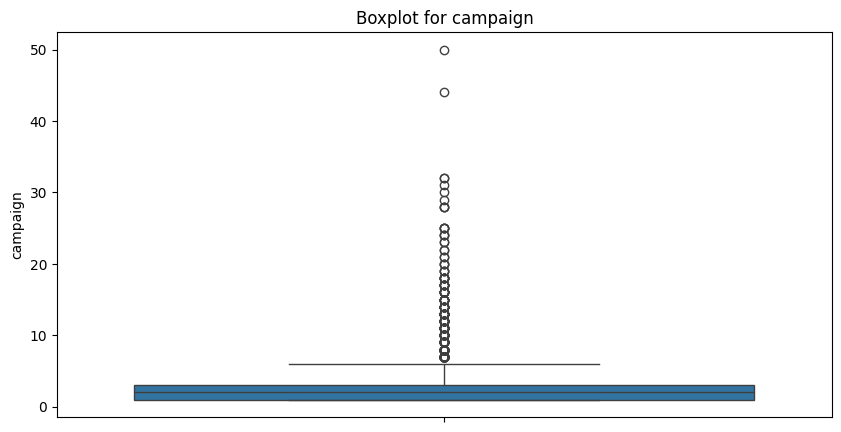

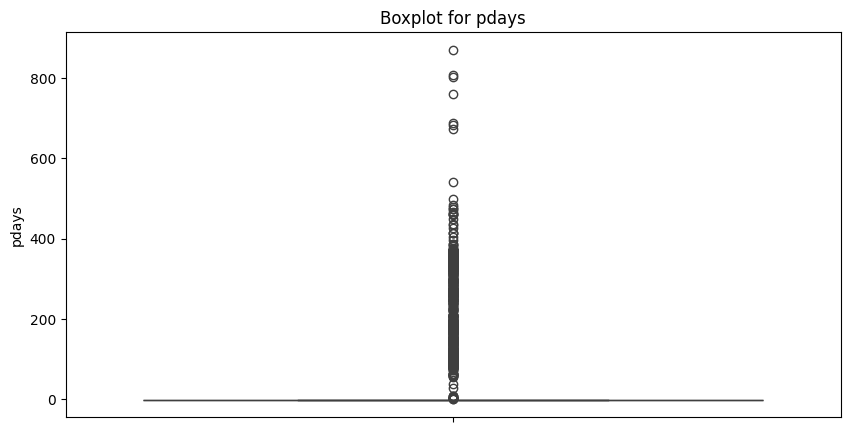

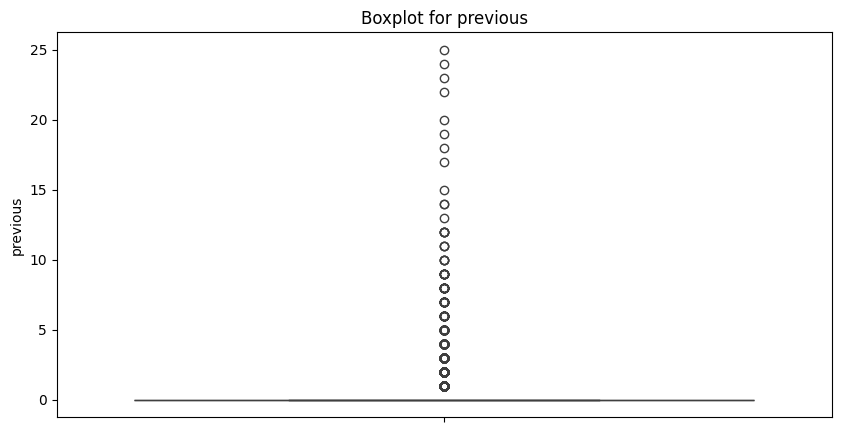

In [79]:
#checking for outliers in numerical columns
numeric_cols =['age', 'balance', 'day',	'duration',	'campaign',	'pdays', 'previous']

for col in numeric_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

In [80]:
# Detect outliers using IQR for each numeric column
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)  # First quartile
    Q3 = data[col].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"{col}:")
    print(f"  Lower Bound: {lower_bound}")
    print(f"  Upper Bound: {upper_bound}")
    print(f"  Outliers Count: {((data[col] < lower_bound) | (data[col] > upper_bound)).sum()}\n")


age:
  Lower Bound: 9.0
  Upper Bound: 73.0
  Outliers Count: 38

balance:
  Lower Bound: -2047.5
  Upper Bound: 3596.5
  Outliers Count: 506

day:
  Lower Bound: -9.0
  Upper Bound: 39.0
  Outliers Count: 0

duration:
  Lower Bound: -233.5
  Upper Bound: 666.5
  Outliers Count: 330

campaign:
  Lower Bound: -2.0
  Upper Bound: 6.0
  Outliers Count: 318

pdays:
  Lower Bound: -1.0
  Upper Bound: -1.0
  Outliers Count: 816

previous:
  Lower Bound: 0.0
  Upper Bound: 0.0
  Outliers Count: 816



#### Summary of Outliers

**Age:** Outliers include individuals older than 73. \
**Balance:** Outliers include negative balances and high positive balances above 3596.\
**Day:** No outliers. All values lie within the range. \
**Duration:** Outliers include call durations greater than 666 seconds (11 minutes).\
**Campaign:** Outliers include clients who were contacted more than 6 times. \
**Pdays:** Outliers include all positive values for pdays. -1 means client wasn't previously contacted. Positive pdays indicates days since last contacted.\
**Previous:** Outliers are all values greater than 0, indicating prior contacts.

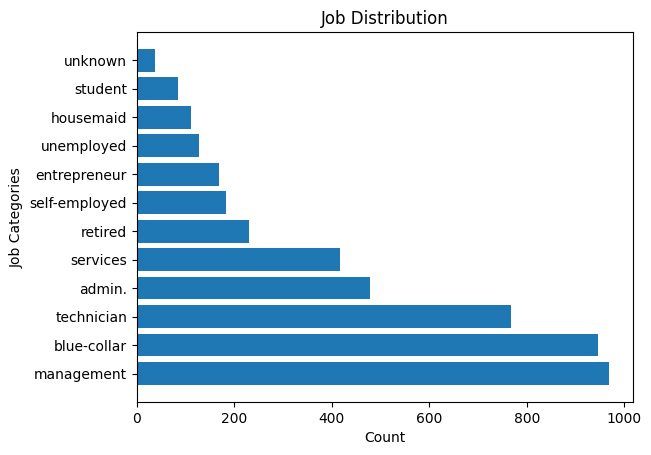

In [81]:
# Visualize distribution of categorical features
job_counts = data['job'].value_counts()

# Plot using barh
plt.barh(job_counts.index, job_counts.values)

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Job Categories')
plt.title('Job Distribution')
plt.show()

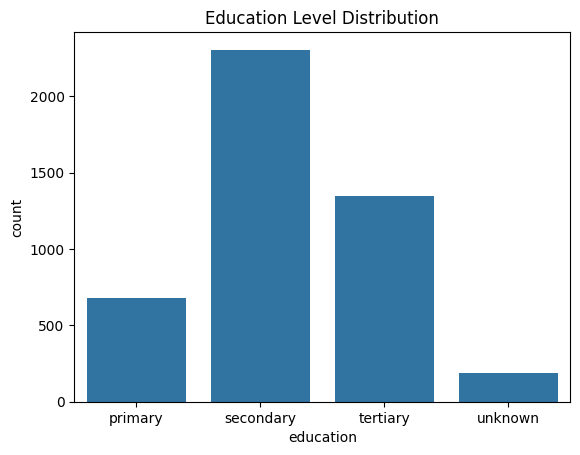

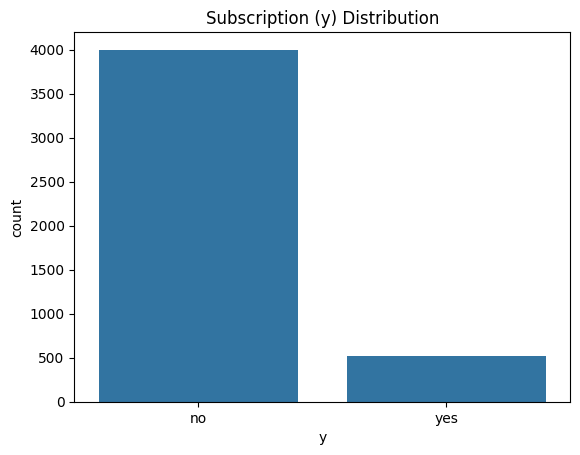

In [82]:
sns.countplot(x='education', data=data)
plt.title('Education Level Distribution')
plt.show()

sns.countplot(x='y', data=data)
plt.title('Subscription (y) Distribution')
plt.show()

The target variable 'y' is imbalanced.

In [83]:
data_copy = data.copy() # set a copy of the data frame

def categorical(data):
    '''This function change data types objects into numerical codes'''
    for col in data.columns:
        if data[col].dtype == 'object':
            data[col] = data[col].astype('category')
            data[col] = data[col].cat.codes

In [86]:
categorical(data_copy)
#  get the correlation between all feature and churn column
subs_corr_df = data_copy.corr()[['y']].sort_values(by='y', ascending=False)
subs_corr_df

,y
y,1.000000
duration,0.401118
previous,0.116714
pdays,0.104087
age,0.045092
education,0.042987
job,0.027401
balance,0.017905
marital,0.015042
default,0.001303


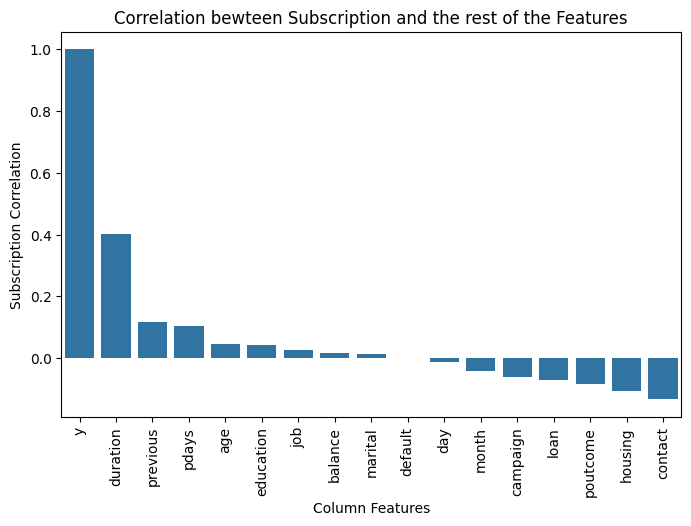

In [87]:
color = sns.color_palette()[0] # get the first color in the seaborn color palette
plt.figure(figsize=(8,5))
# create a barplot for the churn-correlation
sns.barplot(data=subs_corr_df, x=subs_corr_df.index, y='y', color=color)
plt.title('Correlation bewteen Subscription and the rest of the Features')
plt.ylabel('Subscription Correlation')
plt.xlabel('Column Features')
plt.xticks(rotation=90)
plt.show();

### Feature Engineering

In [88]:
# checking the various columns
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

#### Data Splitting

In [89]:
#displaying the target variable
data['y']

0       no
1       no
2       no
3       no
4       no
        ..
4516    no
4517    no
4518    no
4519    no
4520    no
Name: y, Length: 4521, dtype: object

In [90]:
#  change values in target column into numerical data
data['y'] = (data['y'] == 'yes').astype(bool).astype(int)
data['y'].unique()

array([0, 1])

In [91]:
# Use train_test_split with a random_state, and add stratify for Classification

#spliting data into  80% train and  20% test

train, test = train_test_split(data, test_size=0.2, random_state=42)

In [92]:
# create features and targets from the train and test
X_train = train.drop(columns=['y'])
y_train = train['y'].copy()

X_test = test.drop(columns=['y'])
y_test = test['y'].copy()

In [93]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
978,34,entrepreneur,divorced,tertiary,no,262,no,no,cellular,20,nov,371,1,-1,0,unknown
251,32,management,married,tertiary,no,2349,no,no,cellular,14,aug,134,5,-1,0,unknown
3139,34,technician,single,secondary,no,1076,no,no,cellular,8,aug,70,2,-1,0,unknown
1822,31,management,married,tertiary,no,156,no,no,cellular,13,aug,657,7,-1,0,unknown
4445,46,blue-collar,married,primary,no,258,yes,no,unknown,27,may,217,1,-1,0,unknown


#### Creating new features

The following new features will be added:\
**Age_group:** Categorize the age column into meaningful groups such as young, middle_age, senior.\
**Recent_contact:** Convert the pdays column into a binary feature that indicates whether the client was contacted recently or not.\
**Financial_stability:**  Combine balance, housing, and loan to create a binary feature that indicates financial stability.\
**Duration_per_contact:** Calculate the average duration of each contact (duration / campaign) for each client.\
**Contact_method:** Create a binary feature from the contact column that distinguishes between known and unknown contact methods


In [94]:
# 1. Age Group
def categorize_age(age):
    if age < 30:
        return 'young'
    elif 30 <= age < 60:
        return 'middle_aged'
    else:
        return 'senior'

# Apply the function to the age column
X_train['age_group'] = X_train['age'].apply(categorize_age)
X_test['age_group'] = X_test['age'].apply(categorize_age)


#  2. Recent Contact
X_train['recent_contact'] = (X_train['pdays'] != -1).astype(int)
X_test['recent_contact'] = (X_test['pdays'] != -1).astype(int)

# 3. Financial Stability
def compute_financial_stability(row):
    if row['balance'] > 0 and row['housing'] == 'no' and row['loan'] == 'no':
        return 1
    else:
        return 0
X_train['financial_stability'] = X_train.apply(compute_financial_stability, axis=1)
X_test['financial_stability'] = X_test.apply(compute_financial_stability, axis=1)


# 4. Duration per Contact
X_train['duration_per_contact'] = X_train['duration'] / X_train['campaign']
X_test['duration_per_contact'] = X_test['duration'] / X_test['campaign']

X_train['duration_per_contact'] = X_train['duration_per_contact'].fillna(0)
X_test['duration_per_contact'] = X_test['duration_per_contact'].fillna(0)


# 5. Contact Method
X_train['contact_known'] = X_train['contact'].map({'telephone': 1, 'cellular': 1, 'unknown': 0})
X_test['contact_known'] = X_test['contact'].map({'telephone': 1, 'cellular': 1, 'unknown': 0})



In [95]:
#checking dataset with added features
pd.set_option('display.max_columns', None)
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,age_group,recent_contact,financial_stability,duration_per_contact,contact_known
978,34,entrepreneur,divorced,tertiary,no,262,no,no,cellular,20,nov,371,1,-1,0,unknown,middle_aged,0,1,371.000000,1
251,32,management,married,tertiary,no,2349,no,no,cellular,14,aug,134,5,-1,0,unknown,middle_aged,0,1,26.800000,1
3139,34,technician,single,secondary,no,1076,no,no,cellular,8,aug,70,2,-1,0,unknown,middle_aged,0,1,35.000000,1
1822,31,management,married,tertiary,no,156,no,no,cellular,13,aug,657,7,-1,0,unknown,middle_aged,0,1,93.857143,1
4445,46,blue-collar,married,primary,no,258,yes,no,unknown,27,may,217,1,-1,0,unknown,middle_aged,0,0,217.000000,0


In [96]:
#checking dataset with added features
pd.set_option('display.max_columns', None)
X_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,age_group,recent_contact,financial_stability,duration_per_contact,contact_known
2398,51,entrepreneur,married,secondary,yes,-2082,no,yes,cellular,28,jul,123,6,-1,0,unknown,middle_aged,0,0,20.500000,1
800,50,management,married,tertiary,no,2881,no,no,cellular,5,aug,510,2,2,5,other,middle_aged,1,1,255.000000,1
2288,50,technician,married,secondary,no,1412,no,no,cellular,6,aug,131,3,-1,0,unknown,middle_aged,0,1,43.666667,1
2344,37,management,married,tertiary,no,0,yes,no,unknown,3,jun,247,13,-1,0,unknown,middle_aged,0,0,19.000000,0
3615,31,admin.,single,secondary,no,757,no,no,cellular,3,feb,343,2,-1,0,unknown,middle_aged,0,1,171.500000,1


#### Create pipeline

In [102]:
# select the categorical columns from train and test data for encoding
train_cat_cols = X_train.select_dtypes(include=['object', 'category']).columns
test_cat_cols = X_test.select_dtypes(include=['object', 'category']).columns

In [103]:
# select numerical columns from the train and test dataset
train_num_cols=X_train.select_dtypes(exclude=['object', 'category']).columns
test_num_cols=X_test.select_dtypes(exclude=['object', 'category']).columns

In [104]:
# create variables to hold numerical and categorical columns 
num_attribs = list(train_num_cols)
cat_attribs = list(train_cat_cols)
print(num_attribs, cat_attribs)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'recent_contact', 'financial_stability', 'duration_per_contact', 'contact_known'] ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'age_group']


In [105]:
#create a numerical pipeline to standardize and impute the missinf in the numerical columns
num_pipeline = Pipeline([('std_scaler', StandardScaler())])

#create a categorical pipeline to encode and impute the missing in the numerical columns
cat_pipeline = Pipeline([('cat_encoder', OneHotEncoder(handle_unknown='ignore'))])

In [106]:
# Create a fullpipeline by combining numerical and catagorical pioeline
full_pipeline = ColumnTransformer([("numerical",num_pipeline, num_attribs), ("categorical",cat_pipeline, cat_attribs)], )

In [107]:
# use created pipeline to transform train and test features
X_train_prepared = full_pipeline.fit_transform(X_train)
X_test_prepared = full_pipeline.transform(X_test)

In [109]:
# get categorical columns after transformation
cat_features = full_pipeline.named_transformers_['categorical']['cat_encoder'].get_feature_names_out()
cat_features

array(['job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'age_group_middle_aged', 'age_group_senior',
       'age_group_young'], dtype=object)

In [110]:
# combine numerical and categorical columns
columns_ = np.concatenate([train_num_cols, cat_features])

In [111]:
#create train dataframe
X_train_df = pd.DataFrame(X_train_prepared, columns=columns_)
X_train_df.head()

,age,balance,day,duration,campaign,pdays,previous,recent_contact,financial_stability,duration_per_contact,contact_known,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,age_group_middle_aged,age_group_senior,age_group_young
0,-0.678371,-0.413804,0.489967,0.416038,-0.567241,-0.408832,-0.314583,-0.469013,1.439520,1.100430,0.639685,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,-0.866030,0.334571,-0.238237,-0.507522,0.671186,-0.408832,-0.314583,-0.469013,1.439520,-0.704228,0.639685,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,-0.678371,-0.121913,-0.966441,-0.756922,-0.257635,-0.408832,-0.314583,-0.469013,1.439520,-0.661235,0.639685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,-0.959860,-0.451815,-0.359604,1.530545,1.290399,-0.408832,-0.314583,-0.469013,1.439520,-0.352644,0.639685,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.447585,-0.415238,1.339538,-0.184081,-0.567241,-0.408832,-0.314583,-0.469013,-0.694676,0.293000,-1.563269,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [112]:
# create test dataframe
X_test_df = pd.DataFrame(X_test_prepared, columns=columns_)
X_test_df.head()

,age,balance,day,duration,campaign,pdays,previous,recent_contact,financial_stability,duration_per_contact,contact_known,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,age_group_middle_aged,age_group_senior,age_group_young
0,0.916734,-1.254336,1.460905,-0.550388,0.980793,-0.408832,-0.314583,-0.469013,-0.694676,-0.737259,0.639685,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.822904,0.525340,-1.330543,0.957704,-0.257635,-0.378304,2.578429,2.132138,1.439520,0.492236,0.639685,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.822904,-0.001427,-1.209175,-0.519213,0.051972,-0.408832,-0.314583,-0.469013,1.439520,-0.615795,0.639685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,-0.396882,-0.507754,-1.573277,-0.067175,3.148040,-0.408832,-0.314583,-0.469013,-0.694676,-0.745123,-1.563269,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,-0.959860,-0.236303,-1.573277,0.306925,-0.257635,-0.408832,-0.314583,-0.469013,1.439520,0.054442,0.639685,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


#### Balancing Target feature

In [113]:
# Count the number of unique values in the target
y_train.value_counts()

y
0    3193
1     423
Name: count, dtype: int64

In [114]:
# Create an instance of SMOTE and fit it on the train feature and targets
sm = SMOTE(sampling_strategy='minority')
X_train_df, y_train = sm.fit_resample(X_train_df, y_train)

In [115]:
# let's confirm the increase in rows after oversampling
len(X_train_df), len(y_train)

(6386, 6386)

In [116]:
# Confirm values counts for the targets
y_train.value_counts()

y
0    3193
1    3193
Name: count, dtype: int64

### Machine Learning Modeling

In [121]:
#Function to evaluate the model
def evaluate_model(model, test, y_true):
    # Compute the valid metrics for the use case # Optional: show the classification report
    pred = model.predict(test)
    F1 = f1_score(y_true, pred)
    accuracy = accuracy_score(y_true, pred)
    precision = precision_score(y_true, pred)
    recall = recall_score(y_true, pred)
    F2 = fbeta_score(y_true, pred, beta=2.0)
 
    print("classification report : \n", classification_report(y_true, pred))
    cf = confusion_matrix(y_true, pred)
    print("Confusion matrix report : \n", pd.DataFrame(cf, index=['Yes', 'No']))
    sns.heatmap(cf, annot=True)

    return accuracy, precision, recall, F1, F2, pred

#### Logistic Regression

In [117]:
lgr_model = LogisticRegression()

In [118]:
# Use the .fit method
lgr_model.fit(X_train_df, y_train)

LogisticRegression()

classification report : 
               precision    recall  f1-score   support

           0       0.97      0.85      0.91       807
           1       0.39      0.81      0.53        98

    accuracy                           0.84       905
   macro avg       0.68      0.83      0.72       905
weighted avg       0.91      0.84      0.87       905

Confusion matrix report : 
        0    1
Yes  685  122
No    19   79


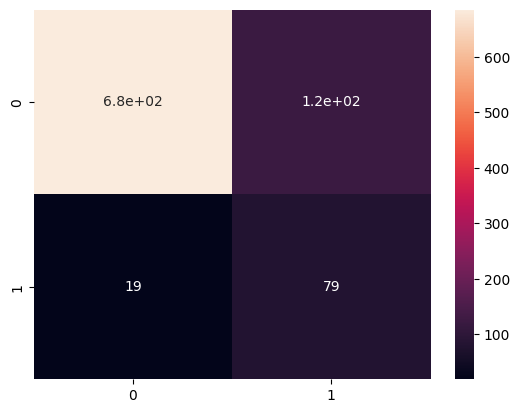

In [122]:
accuracy_lgr_model, precision_lgr_model, recall_lgr_model, F1_lgr_model, F2_lgr_model, lgr_model_pred = evaluate_model(lgr_model, X_test_df, y_test)

In [123]:
results = pd.DataFrame([['Logistic Regression', accuracy_lgr_model, precision_lgr_model, recall_lgr_model, F1_lgr_model, F2_lgr_model]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'F2_score'])
results

,Model,Accuracy,Precision,Recall,F1_score,F2_score
0,Logistic Regression,0.844199,0.393035,0.806122,0.528428,0.666105


#### Support Vector Machine

In [124]:
svm = svm.SVC()

In [125]:
svm.fit(X_train_df, y_train)

SVC()

classification report : 
               precision    recall  f1-score   support

           0       0.96      0.87      0.91       807
           1       0.39      0.66      0.49        98

    accuracy                           0.85       905
   macro avg       0.67      0.77      0.70       905
weighted avg       0.89      0.85      0.87       905

Confusion matrix report : 
        0    1
Yes  706  101
No    33   65


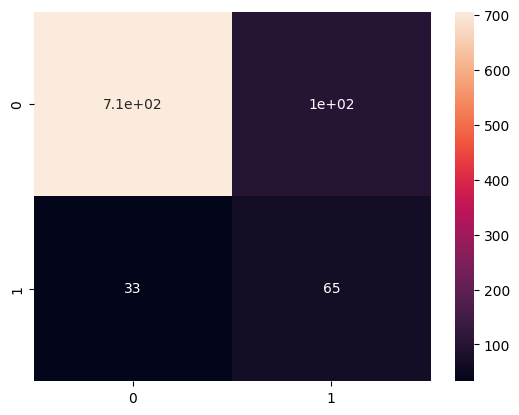

In [126]:
accuracy_svm, precision_svm, recall_svm, F1_svm, F2_svm, svm_pred = evaluate_model(svm, X_test_df, y_test)

In [131]:
model_results = pd.DataFrame([['Support Vector Machine', accuracy_svm, precision_svm, recall_svm, F1_svm, F2_svm]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'F2_score' ])

combined_results = pd.concat([results, model_results],ignore_index = True)
combined_results

,Model,Accuracy,Precision,Recall,F1_score,F2_score
0,Logistic Regression,0.844199,0.393035,0.806122,0.528428,0.666105
1,Support Vector Machine,0.851934,0.391566,0.663265,0.492424,0.582437


#### Random Forest

In [132]:
rfc = RandomForestClassifier()

In [133]:
# Use the fit method
rfc.fit(X_train_df, y_train)

RandomForestClassifier()

classification report : 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       807
           1       0.50      0.42      0.46        98

    accuracy                           0.89       905
   macro avg       0.72      0.68      0.70       905
weighted avg       0.88      0.89      0.89       905

Confusion matrix report : 
        0   1
Yes  766  41
No    57  41


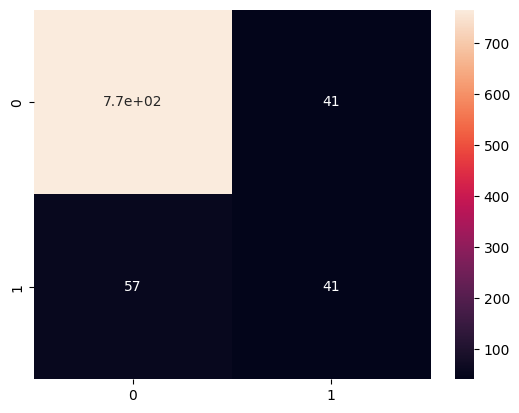

In [134]:
accuracy_rfc, precision_rfc, recall_rfc, F1_rfc, F2_rfc, rfc_pred = evaluate_model(rfc, X_test_df, y_test)

In [135]:
model_results = pd.DataFrame([['Random Forest', accuracy_rfc, precision_rfc, recall_rfc, F1_rfc, F2_rfc]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'F2_score' ])

final_results = pd.concat([combined_results, model_results], ignore_index = True)
final_results

,Model,Accuracy,Precision,Recall,F1_score,F2_score
0,Logistic Regression,0.844199,0.393035,0.806122,0.528428,0.666105
1,Support Vector Machine,0.851934,0.391566,0.663265,0.492424,0.582437
2,Random Forest,0.891713,0.500000,0.418367,0.455556,0.432489


In [ ]:
# drop columns 
# X_train = X_train.drop(columns=['age', ])
# X_test = X_test.drop(columns=[])

In [41]:
# numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
# correlation_matrix = data[numerical_features].corr()

In [67]:
# correlation_matrix

In [68]:
# Plot heatmap
# plt.figure(figsize=(12, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# plt.show()

In [45]:
#from sklearn.ensemble import RandomForestClassifier

# Split the data into X (features) and y (target)
# X = data.drop(columns=['y'])  # Exclude target
# y = data['y']

# # Train a Random Forest model
# model = RandomForestClassifier()
# model.fit(X, y)

# # Get feature importance
# importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
# print(importance.sort_values(by='Importance', ascending=False))


In [46]:
# Identify numerical and categorical features
# numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'duration_per_contact']
# categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'age_group', 'recent_contact', 'financial_stability', 'contact_known']


In [51]:
#Changing the target variable 'y' to numeric to help us during correlation process
# data['y'] = data['y'].map({'yes': 1, 'no': 0})

In [47]:
# Apply one-hot encoding
# df_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)


In [97]:
# df_encoded.head()

In [54]:
# df_encoded['y'] = df_encoded['y'].map({'yes': 1, 'no': 0})

In [98]:
# Compute correlation
# correlation_matrix = df_encoded.corr()

# Visualize with a heatmap
# plt.figure(figsize=(20, 15))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Correlation Matrix (Including Target Variable)')
# plt.show()


In [56]:
# # Compute correlation matrix for one-hot encoded data
# correl_matrix = df_encoded.corr()

# # Visualize with a heatmap (optional)
# plt.figure(figsize=(20, 15))
# sns.heatmap(correl_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Correlation Matrix (One-Hot Encoded Data)')
# plt.show()


In [57]:
# non_numeric_columns = df_encoded.select_dtypes(exclude=['number']).columns
# print("Non-numeric columns:", non_numeric_columns)

In [69]:
# from sklearn.feature_selection import mutual_info_classif

# # Calculate mutual information scores
# X = df_encoded.drop(columns=['y'])  # Features
# y = df_encoded['y']                 # Target

# mutual_info = mutual_info_classif(X, y)
# mutual_info_scores = pd.Series(mutual_info, index=X.columns).sort_values(ascending=False)
# print("Mutual Information Scores:\n", mutual_info_scores)


In [99]:
# Extract correlation with target variable y
# correlation_with_y = correlation_matrix['y'].drop('y')  # Drop 'y' itself
# print(correlation_with_y.sort_values(ascending=False))


In [100]:
# Filter features based on a threshold
# relevant_features = correlation_with_y[abs(correlation_with_y) > 0.1]
# print("Relevant features:\n", relevant_features)


In [101]:
# Filter the correlation matrix for the relevant features
# selected_features_corr = correlation_matrix.loc[relevant_features.index, relevant_features.index]

# # Visualize the correlation among selected features
# plt.figure(figsize=(12, 8))
# sns.heatmap(selected_features_corr, annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Correlation Matrix of Selected Features')
# plt.show()

# # Identify pairs of features with high correlation
# high_corr_pairs = [(col1, col2) for col1 in selected_features_corr.columns 
#                    for col2 in selected_features_corr.columns 
#                    if col1 != col2 and abs(selected_features_corr.loc[col1, col2]) > 0.8]

# print("Highly correlated feature pairs (to address multicollinearity):", high_corr_pairs)


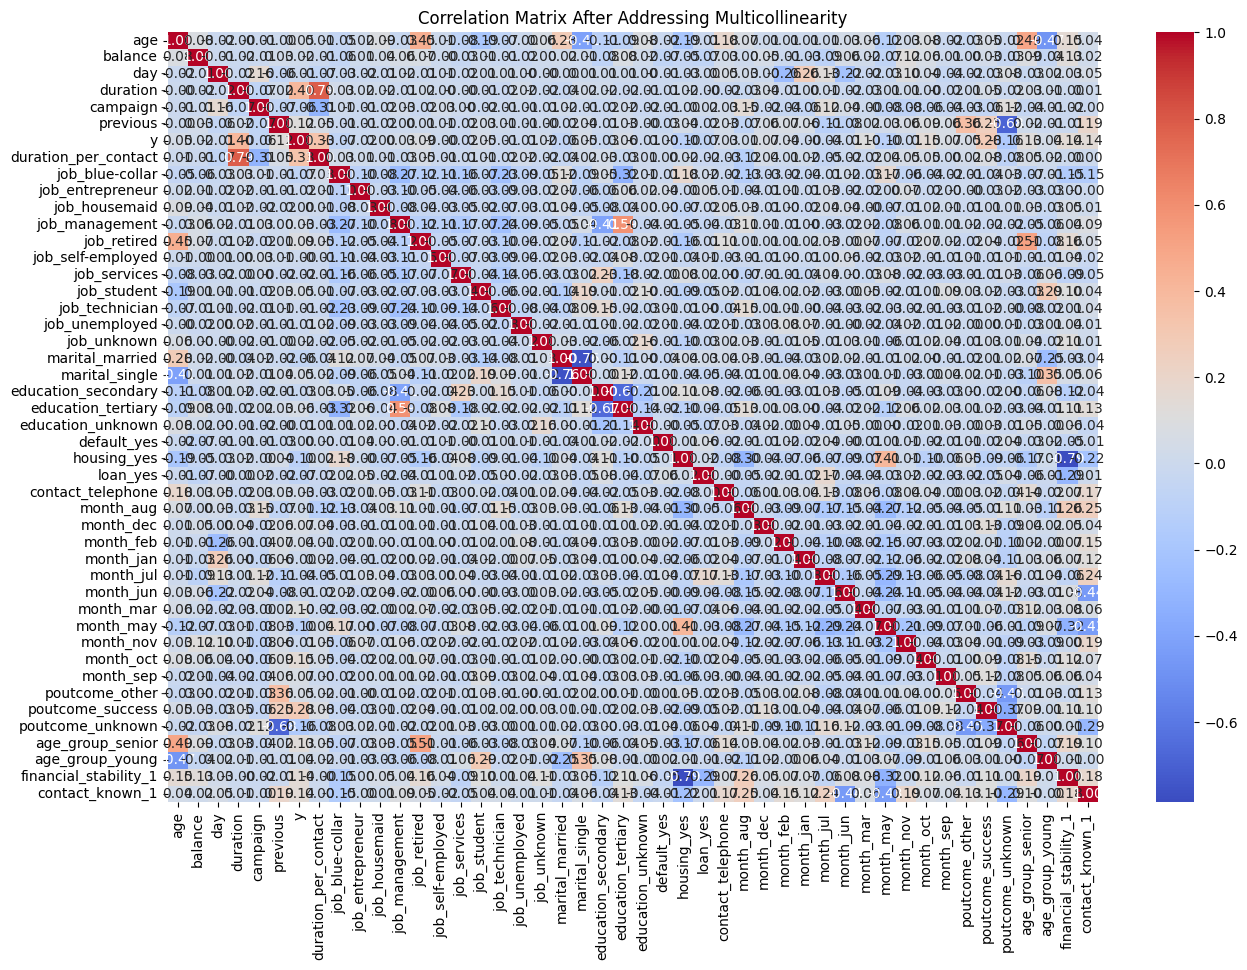

In [62]:
# List of features to drop based on high correlation
# features_to_drop = ['pdays', 'contact_unknown', 'recent_contact_1']

# # Drop the features
# df_encoded_reduced = df_encoded.drop(columns=features_to_drop)

# # Verify the updated correlation matrix
# correlation_matrix_reduced = df_encoded_reduced.corr()
# plt.figure(figsize=(15, 10))
# sns.heatmap(correlation_matrix_reduced, annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Correlation Matrix After Addressing Multicollinearity')
# plt.show()


In [63]:
# Recompute correlation with y
# correlation_with_y_reduced = correlation_matrix_reduced['y'].drop('y')
# print("Updated correlation with target (y):\n", correlation_with_y_reduced.sort_values(ascending=False))


Updated correlation with target (y):
 duration                 0.401118
duration_per_contact     0.334851
poutcome_success         0.283481
month_oct                0.145964
financial_stability_1    0.143221
contact_known_1          0.139399
age_group_senior         0.125847
previous                 0.116714
month_mar                0.102716
job_retired              0.086675
month_sep                0.071510
month_dec                0.069884
education_tertiary       0.056649
poutcome_other           0.051908
job_student              0.047809
marital_single           0.045815
age                      0.045092
age_group_young          0.041421
month_feb                0.039805
job_management           0.032634
contact_telephone        0.025878
job_unknown              0.019886
balance                  0.017905
month_aug                0.012084
job_housemaid            0.004872
default_yes              0.001303
job_self-employed       -0.003827
month_jan               -0.004109
job_unempl

In [66]:
# from sklearn.feature_selection import mutual_info_classif

# # Compute mutual information for each feature
# X = df_encoded_reduced.drop('y', axis=1)
# y = df_encoded_reduced['y'].apply(lambda x: 1 if x == 'yes' else 0)  # Binary encoding for y

# mutual_info = mutual_info_classif(X, y, random_state=42)

# # Create a DataFrame for visualization
# mutual_info_df = pd.DataFrame({
#     'Feature': X.columns,
#     'Mutual Information': mutual_info
# }).sort_values(by='Mutual Information', ascending=False)

# print(mutual_info_df)
